In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

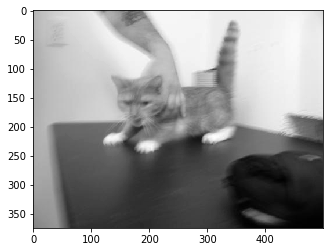

In [2]:
# dataset directory plotting
datadir = os.path.join("Data/PetImages/")
category = ["Cat", "Dog"]

for i in category:
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_to_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_to_array, cmap="gray")
        plt.show()
        break
    break

In [3]:
# dataset load 
training_data = []

def create_training_data():
    for i in category:
        path = os.path.join(datadir, i)
        # membuat cat=0 dan dog=1
        class_num = category.index(i)
        for img in os.listdir(path):
            # menggunakan try karena beberapa gambar mungkin ada yang rusak 
            try:
                # convert menjadi array gambarnya
                img_to_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                # resize jadi 100,100 pixels
                new_array = cv2.resize(img_to_array, (100,100))
                training_data.append([new_array, class_num]) 
            except Exception as e:
                pass
            
create_training_data()

In [4]:
print(len(training_data))

24946


In [5]:
# shuffle data
import random

random.shuffle(training_data)

# print(label data apakah sudah random apa belom)
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
0
0
0
0
1


In [6]:
X = []
y = []

In [7]:
for feature, labes in training_data:
    X.append(feature)
    y.append(labes)
    
X = np.array(X).reshape(-1,100,100,1)

In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

In [9]:
# normalisasi
X = X/255.0

In [10]:
# create model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(100,100,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2166848   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [12]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [13]:
NAME = "Cat-or-Dog"
tboard_log_dir = os.path.join("tensorboard",NAME)
tensorboard = TensorBoard(log_dir = tboard_log_dir)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy")>0.99):
            print(" Reached 99% Accuracy")
            self.model.stop_training = True

callbacks = myCallback()
y = np.array(y)

model.fit(X, y, validation_split=0.2, batch_size=32, epochs=30, callbacks=[callbacks, tensorboard])

Train on 19956 samples, validate on 4990 samples
Epoch 1/30
19956/19956 [==============================] - 351s 18ms/sample - loss: 0.6381 - accuracy: 0.6236 - val_loss: 0.5569 - val_accuracy: 0.7192
Epoch 2/30
19956/19956 [==============================] - 335s 17ms/sample - loss: 0.5095 - accuracy: 0.7531 - val_loss: 0.4942 - val_accuracy: 0.7617
Epoch 3/30
19956/19956 [==============================] - 337s 17ms/sample - loss: 0.4308 - accuracy: 0.7989 - val_loss: 0.4578 - val_accuracy: 0.7882
Epoch 4/30
19956/19956 [==============================] - 359s 18ms/sample - loss: 0.3705 - accuracy: 0.8343 - val_loss: 0.4617 - val_accuracy: 0.7900
Epoch 5/30
19956/19956 [==============================] - 397s 20ms/sample - loss: 0.3038 - accuracy: 0.8693 - val_loss: 0.4935 - val_accuracy: 0.7810
Epoch 6/30
19956/19956 [==============================] - 371s 19ms/sample - loss: 0.2276 - accuracy: 0.9058 - val_loss: 0.5342 - val_accuracy: 0.7914
Epoch 7/30
19956/19956 [=====================

In [14]:
from tensorflow.keras.preprocessing import image

test_dir = os.path.join("Data/test1/")

test_names = os.listdir(test_dir)
print(test_names)

['cat1.jpg', 'cat10.jpg', 'cat2.jpg', 'cat3.jpg', 'cat4.jpg', 'cat5.jpg', 'cat6.jpg', 'cat7.jpg', 'cat8.jpg', 'cat9.jpg', 'dog1.jpg', 'dog10.jpg', 'dog2.jpg', 'dog3.jpg', 'dog4.jpg', 'dog5.jpg', 'dog6.jpg', 'dog7.jpg', 'dog8.jpg', 'dog9.jpg']


In [15]:
for i in test_names:
    path = test_dir + i
    img = image.load_img(path, target_size=(100,100), grayscale=True)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) 
    x = x/255.0
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    result1 = []
    
    if classes > 0.5:
        temp = i + " is a dog"
    else:
        temp = i + " is a cat"
    
    result1.append(temp)
    print(result1)

C:\Anaconda\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


['cat1.jpg is a cat']
['cat10.jpg is a cat']
['cat2.jpg is a cat']
['cat3.jpg is a cat']
['cat4.jpg is a cat']
['cat5.jpg is a cat']
['cat6.jpg is a cat']
['cat7.jpg is a cat']
['cat8.jpg is a cat']
['cat9.jpg is a cat']
['dog1.jpg is a dog']
['dog10.jpg is a dog']
['dog2.jpg is a dog']
['dog3.jpg is a dog']
['dog4.jpg is a dog']
['dog5.jpg is a dog']
['dog6.jpg is a dog']
['dog7.jpg is a dog']
['dog8.jpg is a dog']
['dog9.jpg is a dog']


In [16]:
test_loss, test_acc = model.evaluate(X,y)

24946/24946 [==============================] - 114s 5ms/sample - loss: 0.2257 - accuracy: 0.9535
